<ipython-input-4-67602bb3b7fb>:41: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-67602bb3b7fb>:41: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-67602bb3b7fb>:41: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-67602bb3b7fb>:41: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-67602bb3b7fb>:41: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-67602bb3b7fb>:41: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-67602bb3b7fb>:41: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-in

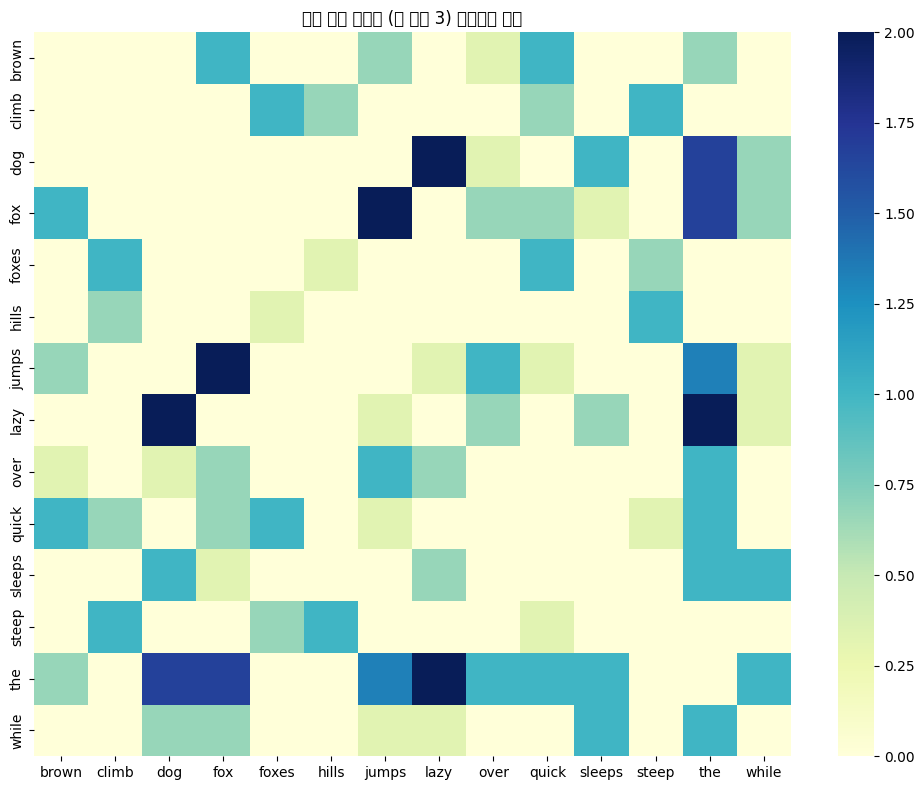


분석:
- 중심 단어에서 가까운 단어일수록 높은 가중치를 부여함
- 'fox'는 'jumps'와 강한 관련을 보임
- 'the', 'lazy', 'dog' 같은 고빈도 단어는 여전히 중심 단어로 많이 등장함



In [4]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 말뭉치 정의
corpus = [
    "the quick brown fox jumps over the lazy dog",
    "the lazy dog sleeps while the fox jumps",
    "quick foxes climb steep hills"
]

# 간단한 split() 기반 토큰화 및 단어 사전 생성
tokenized_corpus = [s.lower().split() for s in corpus]
vocab = sorted(set(word for sentence in tokenized_corpus for word in sentence))
word2idx = {word: idx for idx, word in enumerate(vocab)}

# 선형 가중치 기반 동시출현 행렬 생성 함수
def build_weighted_cooc_matrix(tokenized_corpus, vocab, window_size):
    cooc_matrix = np.zeros((len(vocab), len(vocab)))
    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            center_idx = word2idx[word]
            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    context_word = sentence[j]
                    context_idx = word2idx[context_word]
                    distance = abs(i - j)
                    weight = max(0, (window_size - distance + 1) / window_size)
                    cooc_matrix[center_idx][context_idx] += weight
    return cooc_matrix

# 창 크기 설정 및 행렬 생성
window_size = 3
cooc_matrix = build_weighted_cooc_matrix(tokenized_corpus, vocab, window_size)

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cooc_matrix, xticklabels=vocab, yticklabels=vocab, cmap='YlGnBu')
plt.title(f'선형 감소 가중치 (창 크기 {window_size}) 동시출현 행렬')
plt.tight_layout()
plt.savefig('problem2_linear_weight.png')
plt.show()

# 간단한 분석
print("""
분석:
- 중심 단어에서 가까운 단어일수록 높은 가중치를 부여함
- 'fox'는 'jumps'와 강한 관련을 보임
- 'the', 'lazy', 'dog' 같은 고빈도 단어는 여전히 중심 단어로 많이 등장함
""")
